In [1]:
%run -i "download_dataset.py"

data set loaded


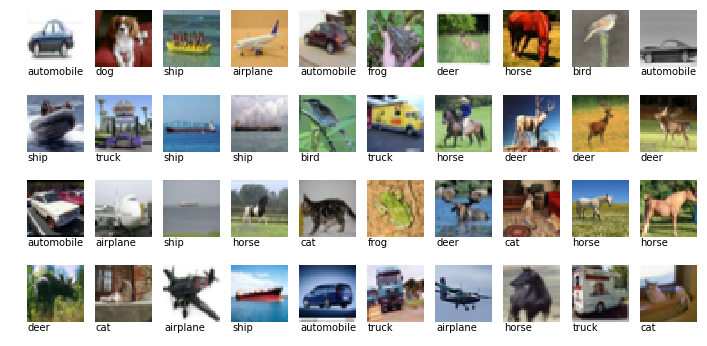

In [2]:
from classifiers.data_set_deserializer import get_data_set, visualize
data_set = get_data_set()
X = data_set.training_pictures
Y = data_set.get_training_labels_text()
visualize(X, Y, (4, 10))

/opt/conda/lib/python2.7/site-packages/skimage/feature/_hog.py:116: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


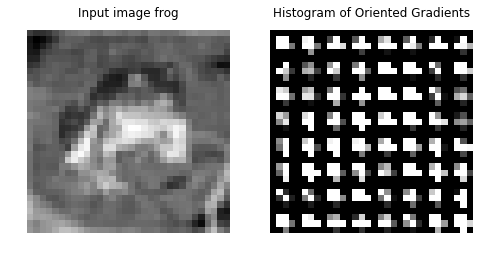

/home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/hog_train_pictures.npy generated
/home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/hog_test_pictures.npy generated
Number of features: 512


In [3]:
from classifiers.hog_features import HogFeaturesDataSet
parameters = {
    'orientations': 8,
    'pixels_per_cell': (4, 4),
    'cells_per_block': (1, 1)
}
hog_features_cells_per_block_1_1 = HogFeaturesDataSet(parameters).get_hog_features(overwrite=True,visualize=True)

In [4]:
from classifiers.svm_wrappers import LinearClassifierGenerator
linear_classifier = LinearClassifierGenerator()

In [5]:
# -s 2 for optimization
linear_classifier.classifier_generator(hog_features_cells_per_block_1_1, params="-s 2 -c 4 -B 1", save=True)

-day15-hour-23-47-22
Accuracy = 44.05% (4405/10000) (classification)
lin svm model saved to /home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/linear_svm-day15-hour-23-47-51
Generated model details:
('acc ', 44.05, 'mean_square ', 10.6744, ' correlation', 0.14461851915999885)


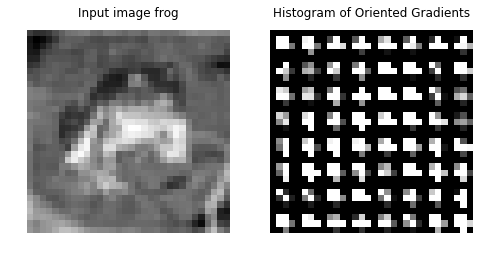

/home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/hog_train_pictures.npy generated
/home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/hog_test_pictures.npy generated
Number of features: 1568


In [6]:
from classifiers.hog_features import HogFeaturesDataSet
parameters = {
    'orientations': 8,
    'pixels_per_cell': (4, 4),
    'cells_per_block': (2, 2)
}
hog_features = HogFeaturesDataSet(parameters).get_hog_features(overwrite=True,visualize=True)

In [7]:
# -s 2 for optimization
linear_classifier.classifier_generator(hog_features, params="-s 2 -c 4 -B 1", save=True)

-day15-hour-23-48-34
Accuracy = 53.5% (5350/10000) (classification)
lin svm model saved to /home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/linear_svm-day15-hour-23-51-08
Generated model details:
('acc ', 53.5, 'mean_square ', 8.5561, ' correlation', 0.24044902251280342)


Using TensorFlow backend.


Test features:
Loading features
generating finish
Train features:
Loading features
generating finish


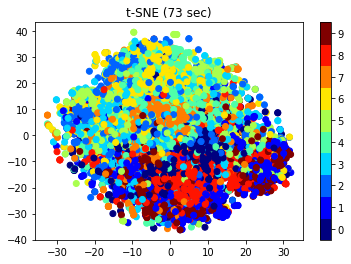

In [8]:
from classifiers.vgg16_features import Vgg16FeatureDataSet
from classifiers.t_sne import visualize_features_pypl_tsne_fast

vgg16_features = Vgg16FeatureDataSet().get_features(overwrite=False)
visualize_features_pypl_tsne_fast(vgg16_features, 10000)

In [9]:
linear_classifier.classifier_generator(vgg16_features, params="-s 2 -c 4 -B 1", save=True)

-day15-hour-23-52-26
Accuracy = 65.95% (6595/10000) (classification)
lin svm model saved to /home/keras/workspace/mac_rl/tooplox_classifier/serialized_data/linear_svm-day15-hour-23-52-43
Generated model details:
('acc ', 65.95, 'mean_square ', 6.5001, ' correlation', 0.37673733460285064)


In [11]:
from classifiers.svm_wrappers import KernelClassifierGenerator
kernel_classifier = KernelClassifierGenerator()

In [ ]:
kernel_classifier.classifier_generator(vgg16_features, params="-h 0 -c 4", save=True)

-day16-hour-00-50-06


In [ ]:
kernel_classifier.classifier_generator(vgg16_features, params="-h 0 -b 1", save=True)